# Analysis of results 

In [1]:
cd ~/thesis/

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Initial processing

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import ast

from analysis_utils import *

/tmp/ipykernel_620/70208650.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
results_df = pd.read_csv('results.csv')

In [6]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'parameters': '(128, 80, 160, 4, 4)',
          'num_different_nodes': 512}

In [7]:
sub_df = accu_time_df_gen(results_df, config)

In [8]:
# Calculate the average accuracy difference
avg_accuracy_diff_perc = 100* (abs(sub_df.loc[0, 'average_accuracy'] - sub_df.loc[1, 'average_accuracy']) / sub_df.loc[0, 'average_accuracy'])

# Calculate the training time difference
training_time_diff_perc = 100* (abs(sub_df.loc[0, 'training_time'] - sub_df.loc[1, 'training_time'])) / sub_df.loc[0, 'training_time']

In [9]:
avg_accuracy_diff_perc, training_time_diff_perc

(1.0062304228615382, 69.9747829843204)

In [10]:
sub_df

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 80, 160, 4, 4)",extend,0.790612,415.683768
1,cora,local,"(128, 80, 160, 4, 4)",extend,0.782657,124.809953


### Hyperparameter tuning

In [62]:
# Should have been 300 (?)
all_parameters = list(results_df['parameters'].unique())
len(all_parameters)

371

In [63]:
all_parameters

['(128, 80, 80, 0.25, 1)',
 '(128, 40, 80, 0.25, 1)',
 '(128, 40, 80, 0.25, 4)',
 '(128, 40, 80, 0.25, 2)',
 '(128, 80, 80, 4, 4)',
 '(128, 80, 80, 4, 2)',
 '(128, 80, 80, 4, 1)',
 '(128, 80, 80, 2, 4)',
 '(128, 80, 80, 2, 2)',
 '(128, 80, 80, 2, 1)',
 '(128, 80, 80, 1, 4)',
 '(128, 80, 80, 1, 2)',
 '(128, 80, 80, 1, 1)',
 '(128, 80, 80, 0.25, 4)',
 '(128, 80, 80, 0.25, 2)',
 '(128, 40, 80, 4, 4)',
 '(128, 40, 80, 4, 2)',
 '(128, 40, 80, 4, 1)',
 '(128, 40, 80, 2, 4)',
 '(128, 40, 80, 2, 2)',
 '(128, 40, 80, 2, 1)',
 '(128, 40, 80, 1, 4)',
 '(128, 40, 80, 1, 2)',
 '(128, 40, 80, 1, 1)',
 '(128, 40, 80, 0.25, 0.5)',
 '(128, 40, 80, 0.25, 0.25)',
 '(128, 80, 160, 4, 4)',
 '(128, 80, 160, 4, 2)',
 '(128, 80, 160, 4, 1)',
 '(128, 80, 160, 4, 0.5)',
 '(128, 80, 160, 4, 0.25)',
 '(128, 80, 160, 2, 4)',
 '(128, 80, 160, 2, 2)',
 '(128, 80, 160, 2, 1)',
 '(128, 80, 160, 2, 0.5)',
 '(128, 80, 160, 2, 0.25)',
 '(128, 80, 160, 1, 4)',
 '(128, 80, 160, 1, 2)',
 '(128, 80, 160, 1, 1)',
 '(128, 80, 

In [64]:
# all_parameters = [ast.literal_eval(param_str) for param_str in all_parameters]

D = set()
R = set()
L = set()
P = set()
Q = set()


for param in all_parameters:
    d, r, l, p, q = param
    D.add(d)
    R.add(r)
    L.add(l)
    P.add(p)
    Q.add(q)


D, R, L, P, Q

ValueError: too many values to unpack (expected 5)

#### Cora

In [65]:
config = {'dataset': 'cora',
        #   'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}

In [66]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

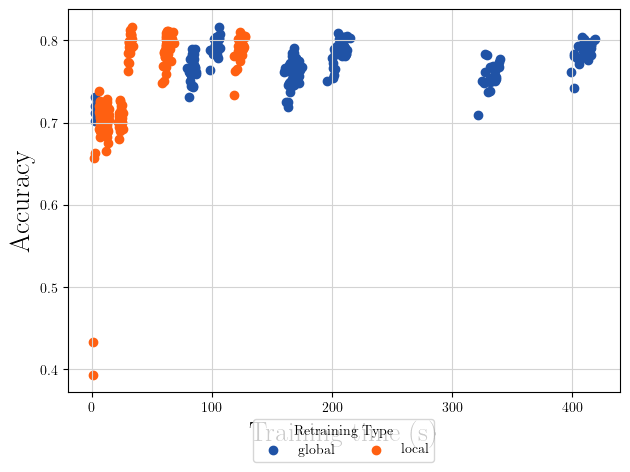

In [67]:
accu_time_plot(all_df)

In [68]:
# sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
all_df.sort_values(by='average_accuracy', ascending=False).head(15)

cora,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
83,cora,local,"(128, 40, 80, 2, 1)",extend,0.816479,33.817051
66,cora,global,"(128, 40, 80, 4, 2)",extend,0.816394,105.576616
103,cora,local,"(128, 40, 80, 0.25, 0.25)",extend,0.812863,31.953484
307,cora,local,"(128, 40, 160, 1, 1)",extend,0.811209,62.478489
291,cora,local,"(128, 40, 160, 2, 0.5)",extend,0.810902,63.524729
227,cora,local,"(128, 80, 80, 1, 0.25)",extend,0.810208,64.816080
211,cora,local,"(128, 80, 80, 4, 0.25)",extend,0.810062,67.367942
175,cora,local,"(128, 80, 160, 0.5, 1)",extend,0.809882,123.806995
254,cora,global,"(128, 80, 80, 0.25, 0.25)",extend,0.809080,204.833654
327,cora,local,"(128, 40, 160, 0.5, 1)",extend,0.808739,61.532741


In [69]:
all_df.loc[all_df['retraining_type'] == 'global']

cora,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 80, 80, 0.25, 1)",prune,0.768886,164.298851
2,cora,global,"(128, 80, 80, 0.25, 1)",extend,0.788981,203.486490
4,cora,global,"(128, 40, 80, 0.25, 1)",prune,0.750689,81.678901
6,cora,global,"(128, 40, 80, 0.25, 1)",extend,0.794214,102.186127
8,cora,global,"(128, 40, 80, 0.25, 4)",prune,0.730827,80.774523
...,...,...,...,...,...,...
398,cora,global,"(128, 40, 80, 0.5, 0.25)",extend,0.785540,104.126992
400,cora,global,"[64, 8, 8, 0.25, 4]",prune,0.711445,2.311835
402,cora,global,"[64, 8, 8, 0.25, 4]",extend,0.719772,3.050927
404,cora,global,"[64, 8, 8, 0.25, 4]",prune,0.701516,2.295618


In [70]:
temp_df = all_df.loc[all_df['retraining_type'] == 'global']
dict(temp_df.iloc[temp_df['average_accuracy'].argmax()])

{'dataset': 'cora',
 'retraining_type': 'global',
 'parameters': '(128, 40, 80, 4, 2)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.8163936506487652,
 'training_time': 105.576616048813}

#### Wikipedia 

In [71]:
config = {'dataset': 'wikipedia',
        #   'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}


In [72]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

In [88]:
def accu_time_plot(all_df):
    '''
        Plots accuracy-time scatter plot
    '''

    # Set font to Computer Modern
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Computer Modern'
    # plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['text.usetex'] = True  # Use LaTeX for rendering text

    # Dataset name
    name = all_df.columns.name

    # Map colors
    colors = all_df['retraining_type'].map({'global': '#2053A6', 'local': '#FF6011'})

    # Scatter plot for each category
    for retraining_type, color in {'global': '#2053A6', 'local': '#FF6011'}.items():
        subset = all_df[all_df['retraining_type'] == retraining_type]
        plt.scatter(subset['training_time'], subset['average_accuracy'], c=color, label=retraining_type)

    # Show dashed grid lines
    plt.rc('axes', axisbelow=True)
    plt.grid(color='lightgrey')
    
    plt.xlabel('Training time (s)', fontdict={'size': 20})
    plt.ylabel('Accuracy', fontdict={'size': 20})

    # plt.title(f'Scatter Plot of Accuracy-Time for {name} dataset')

    # Adjust the legend
    # plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.9))
    
    # Adjust spacing
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'figures/accu_time_all_params_{name}_plot.pdf', dpi=100, bbox_inches='tight')

    plt.show()

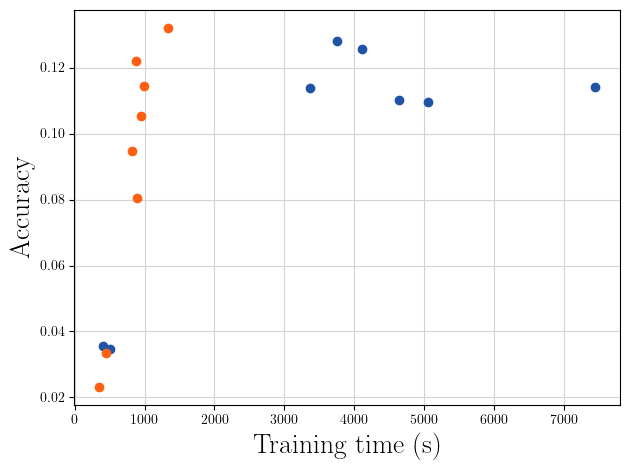

In [89]:
accu_time_plot(all_df)

In [134]:
temp_df = all_df.loc[all_df['retraining_type'] == 'global']
dict(temp_df.iloc[all_df['average_accuracy'].argmax()])

{'dataset': 'wikipedia',
 'retraining_type': 'global',
 'parameters': '[64, 8, 8, 0.25, 4]',
 'dynamic_update': 'extend',
 'average_accuracy': 0.03458389600716626,
 'training_time': 503.338453769684}

#### PPI

In [91]:
config = {'dataset': 'PPI',
          'metric': 'macro',
          'num_different_nodes': 512}

In [92]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

In [93]:
# sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
all_df.sort_values(by='average_accuracy', ascending=False).head(15)

PPI,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,PPI,global,"(128, 80, 80, 0.25, 1)",prune,0.103920,658.539948
83,PPI,local,"(128, 40, 80, 2, 1)",extend,0.103872,103.184063
36,PPI,global,"(128, 80, 80, 2, 1)",prune,0.103022,664.677804
68,PPI,global,"(128, 40, 80, 4, 1)",prune,0.101758,343.939501
23,PPI,local,"(128, 80, 80, 4, 2)",extend,0.101657,172.781480
27,PPI,local,"(128, 80, 80, 4, 1)",extend,0.101450,167.833059
24,PPI,global,"(128, 80, 80, 4, 1)",prune,0.099235,659.021818
32,PPI,global,"(128, 80, 80, 2, 2)",prune,0.099116,673.238465
43,PPI,local,"(128, 80, 80, 1, 4)",extend,0.098656,174.081321
102,PPI,global,"(128, 40, 80, 0.25, 0.25)",extend,0.098650,388.765121


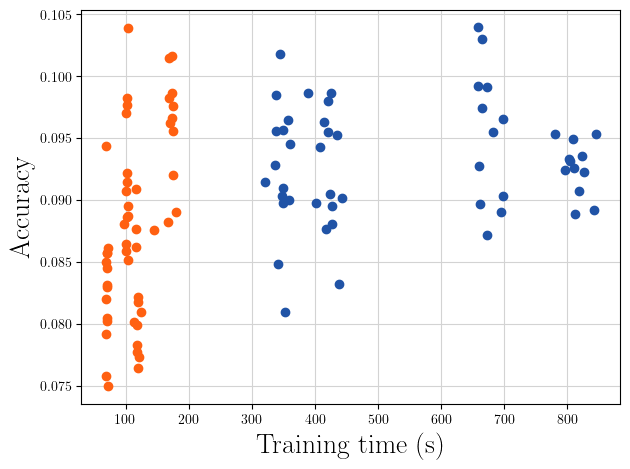

In [94]:
accu_time_plot(all_df)

In [95]:
temp_df = all_df.loc[all_df['retraining_type'] == 'global']
dict(temp_df.iloc[temp_df['average_accuracy'].argmax()])

{'dataset': 'PPI',
 'retraining_type': 'global',
 'parameters': '(128, 80, 80, 0.25, 1)',
 'dynamic_update': 'prune',
 'average_accuracy': 0.10392025126642672,
 'training_time': 658.539947986603}

#### BlogCatalog

In [96]:
config = {'dataset': 'blog_catalog',
        # 'dynamic_update': 'extend',
        'metric': 'macro',
        'num_different_nodes': 512}

In [97]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)
# sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
all_df.sort_values(by='average_accuracy', ascending=False).head(15)

blog_catalog,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
6,blog_catalog,global,"(128, 40, 80, 0.25, 1)",extend,0.206375,4956.535452
9,blog_catalog,local,"(128, 40, 80, 0.25, 1)",extend,0.204560,1466.205247
4,blog_catalog,global,"(128, 40, 80, 0.25, 1)",prune,0.204061,4434.546483
0,blog_catalog,global,"(128, 80, 80, 0.25, 1)",prune,0.203846,7917.033863
13,blog_catalog,local,"(128, 40, 80, 0.25, 1)",extend,0.203679,1459.789268
10,blog_catalog,global,"(128, 40, 80, 0.25, 1)",prune,0.203380,4254.954576
3,blog_catalog,local,"(128, 80, 80, 0.25, 1)",extend,0.202358,1724.187371
8,blog_catalog,global,"(128, 40, 80, 0.25, 1)",extend,0.201024,5098.421046
2,blog_catalog,global,"(128, 80, 80, 0.25, 1)",extend,0.198858,8798.809094
5,blog_catalog,local,"(128, 40, 80, 0.25, 1)",prune,0.198408,1480.310039


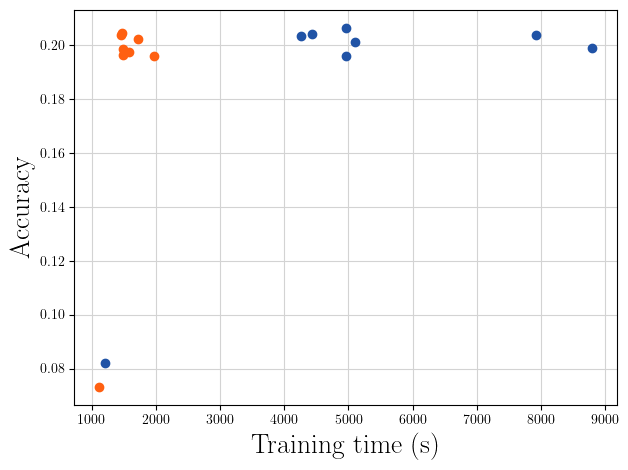

In [98]:
accu_time_plot(all_df)

## Table of results for specific dataset

In [26]:
perc_list = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']

In [28]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'parameters': '(128, 40, 80, 4, 2)',
          'num_different_nodes': 512}

In [29]:
table_df = table_df_gen(results_df, config)

In [30]:
dict(sub_df.iloc[sub_df['average_accuracy'].argmax()])

{'dataset': 'cora',
 'retraining_type': 'global',
 'parameters': '(128, 80, 160, 4, 4)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.7906122755311732,
 'training_time': 415.683768033981}

In [31]:
np.arange(0.1, 1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [32]:
# Filter the DataFrame for 'macro' and 'micro' scores
macro_df = table_df[table_df['metric'] == 'macro']
micro_df = table_df[table_df['metric'] == 'micro']

# X-axis values
x_values = 1 - np.arange(0.1, 1, 0.1)

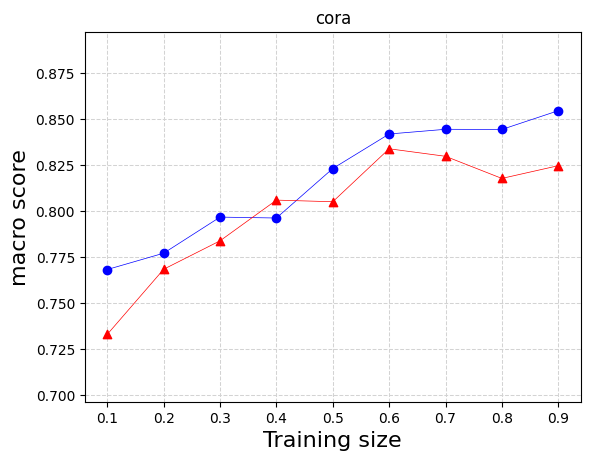

In [34]:
# Plot for macro scores
table_scores_plot(macro_df, 'macro')

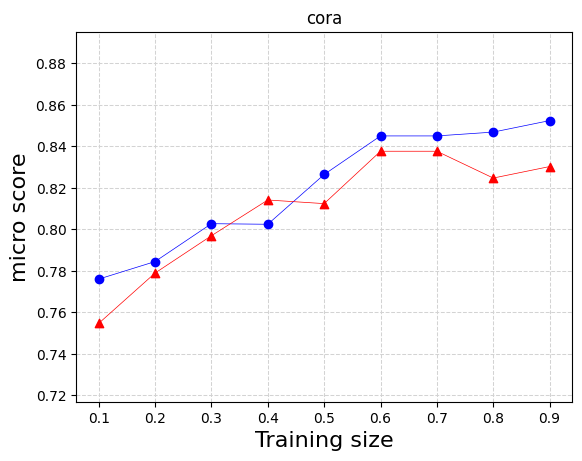

In [35]:
# Plot for macro scores
table_scores_plot(micro_df, 'micro')

In [99]:
# These are the parameters for calculating the gloal/local difference
config = {'parameters': '(128, 40, 80, 0.25, 1)',
         'num_different_nodes': 512,
         'dynamic_update': 'extend'}

dfs = []
dataset_names = ['cora', 'wikipedia', 'PPI', 'blog_catalog']

for dataset in dataset_names:

    config['dataset'] = dataset

    table_df = table_df_gen(results_df, config)

    dfs.append(table_df)

dfs[-1] = dfs[-1].loc[:3]  

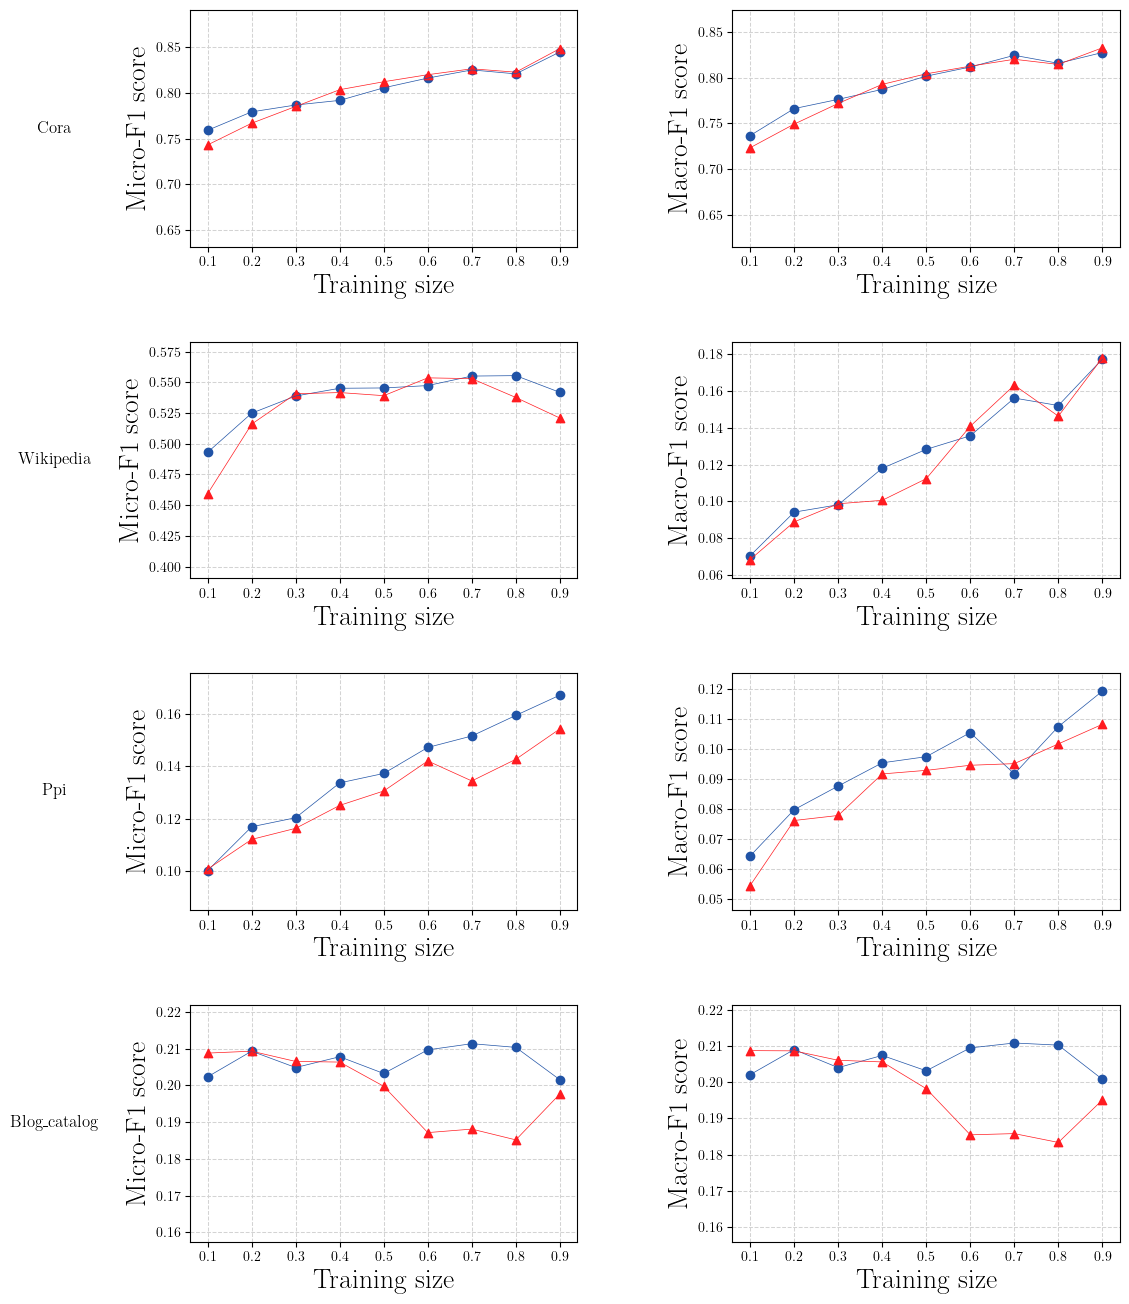

In [100]:
exp_table_scores_plot(dfs, dataset_names)

## Graphs 

In [38]:
speed_df = sub_df.copy()

In [39]:
speed_df.sort_values(by='average_accuracy', ascending=False).head(30)['parameters']

0    (128, 80, 160, 4, 4)
1    (128, 80, 160, 4, 4)
Name: parameters, dtype: object

In [40]:
# Function to convert string to tuple and extract required elements
def extract_elements(param_str):
    tuple_obj = ast.literal_eval(param_str)
    return tuple_obj[1], tuple_obj[2]

# Apply the function to the 'parameters' column and create new columns
speed_df[['walk_length', 'walks_num']] = speed_df['parameters'].apply(lambda x: pd.Series(extract_elements(x)))

In [41]:
speed_df.tail(8)

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time,walk_length,walks_num
0,cora,global,"(128, 80, 160, 4, 4)",extend,0.790612,415.683768,80,160
1,cora,local,"(128, 80, 160, 4, 4)",extend,0.782657,124.809953,80,160


In [42]:
speed_df = speed_df.loc[speed_df['walk_length'] != 8]

In [43]:
speed_df['walk_length'].unique()

array([80])

In [44]:
global_speed_df = speed_df.loc[speed_df['retraining_type'] == 'global']
local_speed_df = speed_df.loc[speed_df['retraining_type'] == 'local']

In [45]:
global_speed_df

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time,walk_length,walks_num
0,cora,global,"(128, 80, 160, 4, 4)",extend,0.790612,415.683768,80,160


In [46]:
global_speed_df.loc[global_speed_df['walk_length'] == 80, 'training_time'].mean()

415.683768033981

In [47]:
local_speed_df.loc[local_speed_df['walk_length'] == 80, 'training_time'].mean()


124.809953451157

In [48]:
global_speed_df.loc[global_speed_df['walk_length'] == 40, 'training_time'].mean()

nan

In [49]:
local_speed_df.loc[local_speed_df['walk_length'] == 40, 'training_time'].mean()

nan

## One parameter set evaluation 

In [6]:
param_df = results_df.loc[results_df['parameters'] == '(128, 40, 80, 0.25, 1)']

In [7]:
# These are the parameters for calculating the gloal/local difference
config = {'parameters': '(128, 40, 80, 0.25, 1)',
          'metric': 'macro',
          'num_different_nodes': 512}

all_stats_dict = {'extend': {}, 'prune': {}}

for dynamic_update in all_stats_dict:

    for dataset in param_df['dataset'].unique():
        
        config['dataset'] = dataset
        sub_df = accu_time_df_gen(param_df, config)

        # if dynamic_update in list(sub_df['dynamic_update']):
        dynamic_df = sub_df[sub_df['dynamic_update'] == dynamic_update]
        dynamic_df = dynamic_df.reset_index(drop=True)

        #  # Calculate the average accuracy difference
        # avg_accuracy_diff_perc = 100 * (abs(dynamic_df.loc[0, 'average_accuracy'] - dynamic_df.loc[1, 'average_accuracy']) / dynamic_df.loc[0, 'average_accuracy'])

        # # Calculate the training time difference
        # training_time_diff_perc = 100 * (abs(dynamic_df.loc[0, 'training_time'] - dynamic_df.loc[1, 'training_time'])) / dynamic_df.loc[0, 'training_time']

        # Calculate the average accuracy difference
        avg_accuracy_diff_perc = (abs(dynamic_df.loc[0, 'average_accuracy'] - dynamic_df.loc[1, 'average_accuracy']) / dynamic_df.loc[0, 'average_accuracy'])

        # Calculate the training time difference
        training_time_diff_perc = (abs(dynamic_df.loc[0, 'training_time'] - dynamic_df.loc[1, 'training_time'])) / dynamic_df.loc[0, 'training_time']

        all_stats_dict[dynamic_update].update({dataset: (avg_accuracy_diff_perc, training_time_diff_perc)})


In [8]:
all_stats_dict

{'extend': {'blog_catalog': (0.04318085228351184, 0.6801121722255823),
  'wikipedia': (0.029285962240930375, 0.786130452798154),
  'PPI': (0.06563866343758801, 0.759588752940188),
  'cora': (0.0036741912773315976, 0.6984596418737402)},
 'prune': {'blog_catalog': (0.027702744479716407, 0.6661868255195622),
  'wikipedia': (0.1672134276511298, 0.7541873442683947),
  'PPI': (0.1066271459251596, 0.7964285125068936),
  'cora': (0.07093595182937153, 0.9196668580929749)}}

In [9]:
'prune' in list(sub_df['dynamic_update'])

True

In [10]:
sub_df = accu_time_df_gen(param_df, config)
sub_df

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",prune,0.750689,81.678901
1,cora,local,"(128, 40, 80, 0.25, 1)",prune,0.697438,6.561523
2,cora,global,"(128, 40, 80, 0.25, 1)",extend,0.794214,102.186127
3,cora,local,"(128, 40, 80, 0.25, 1)",extend,0.791296,30.813241


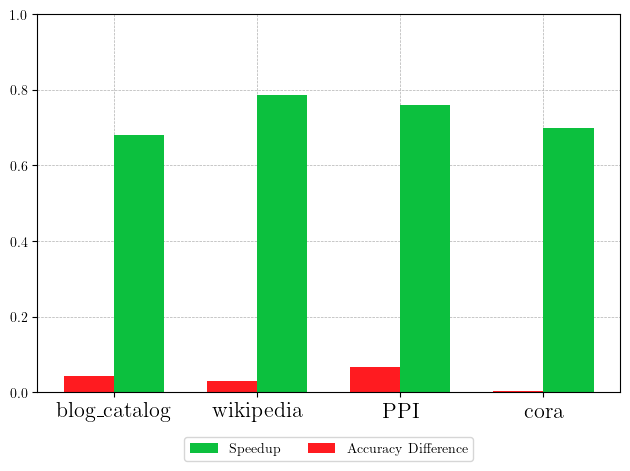

In [104]:
dynamic_update = 'extend'
stats_dict = all_stats_dict[dynamic_update]

accu_speedup_dataset_plot(all_stats_dict, dynamic_update)

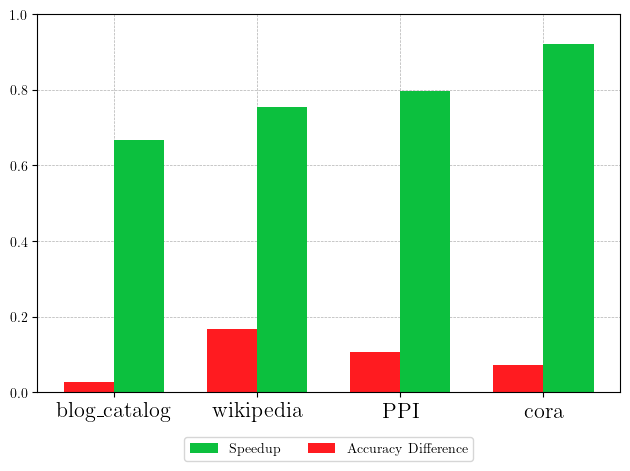

In [105]:
dynamic_update = 'prune'
stats_dict = all_stats_dict[dynamic_update]

accu_speedup_dataset_plot(all_stats_dict, dynamic_update)

## Walk length

In [118]:
def dataset_walk_scores_gen(dynamic_update):
    '''
        Generates macro scores for every dataset
        for different walk lengths
    '''

    # all_datasets = list(results_df['dataset'].unique())
    # dynamic_update = 'extend'   

    all_datasets = ['blog_catalog', 'wikipedia', 'PPI', 'cora']
    all_parameters = list(results_df['parameters'].unique())

    config = {  'dynamic_update': dynamic_update,
                'metric': 'macro',
                'num_different_nodes': 512}

    all_dataset_walk_dict = {}

    for dataset in all_datasets:
        config['dataset'] = dataset
        
        all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

        # Apply the function to the 'parameters' column and create new columns
        all_df[['walk_length', 'walks_num']] = all_df['parameters'].apply(lambda x: pd.Series(extract_elements(x)))

        all_df = all_df[['dataset', 'retraining_type', 'dynamic_update', 'walk_length', 'walks_num', 'average_accuracy', 'training_time']]
        all_df = all_df.loc[all_df['walk_length'] != 8]

        walk_df = all_df.groupby(['walk_length']).mean(['average_accuracy', 'training_time']).reset_index()

        dataset_walk_metric_dict = {row['walk_length']: [row['average_accuracy'], row['training_time']] for _, row in walk_df.iterrows()}

        all_dataset_walk_dict[dataset] = dataset_walk_metric_dict

    
    return all_dataset_walk_dict

In [119]:
all_dataset_walk_dict = dataset_walk_scores_gen('extend')
all_dataset_walk_dict

{'blog_catalog': {40.0: [0.201524007815397, 3256.033997217814],
  80.0: [0.2006078126419657, 5261.4982323646545]},
 'wikipedia': {40.0: [0.11453129285081913, 2771.782344857853],
  80.0: [0.12305040023738106, 4396.736878275871]},
 'PPI': {40.0: [0.09210627757010621, 261.20492931774686],
  80.0: [0.09393444069159347, 492.3110450108846]},
 'cora': {40.0: [0.7914862135452094, 100.90610643863675],
  80.0: [0.7900403366123152, 201.27813012838362]}}

In [120]:
all_dataset_walk_dict = dataset_walk_scores_gen('prune')
all_dataset_walk_dict

{'blog_catalog': {40.0: [0.2005410193711704, 2915.956110060215],
  80.0: [0.19999769708238802, 4940.151242733001]},
 'wikipedia': {40.0: [0.10423977733313412, 2208.3137067556386]},
 'PPI': {40.0: [0.08762960768875264, 208.00507601669864],
  80.0: [0.08845783844683341, 396.1347808539868]},
 'cora': {40.0: [0.7356225974485624, 67.35816725015638],
  80.0: [0.7333733544507433, 134.51013869524004]}}

From these results we have similar accuracy but half training time with half walk length (for cora)

In [121]:
np.mean(all_df[all_df['walk_length'] == 40]['average_accuracy'])

KeyError: 'walk_length'

In [ ]:
np.mean(all_df[all_df['walk_length'] == 80]['average_accuracy'])

0.7900403366123153

In [ ]:
np.mean(all_df[all_df['walk_length'] == 40]['training_time'])

100.90610643863675

In [ ]:
np.mean(all_df[all_df['walk_length'] == 80]['training_time'])

201.27813012838368

In [ ]:
# fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# # Bar plot for Accuracy
# sns.barplot(ax=axes[0], data=df.melt(id_vars=['Dataset'], value_vars=['Walk Length 1 Accuracy', 'Walk Length 2 Accuracy']),
#             x='Dataset', y='value', hue='variable')
# axes[0].set_title('Accuracy by Dataset and Walk Length')
# axes[0].set_ylabel('Accuracy')
# axes[0].set_xlabel('')

# # Bar plot for Time
# sns.barplot(ax=axes[1], data=df.melt(id_vars=['Dataset'], value_vars=['Walk Length 1 Time', 'Walk Length 2 Time']),
#             x='Dataset', y='value', hue='variable')
# axes[1].set_title('Time by Dataset and Walk Length')
# axes[1].set_ylabel('Time')
# axes[1].set_xlabel('Dataset')

# plt.tight_layout()
# plt.show()


In [122]:
all_dataset_walk_dict

{'blog_catalog': {40.0: [0.2005410193711704, 2915.956110060215],
  80.0: [0.19999769708238802, 4940.151242733001]},
 'wikipedia': {40.0: [0.10423977733313412, 2208.3137067556386]},
 'PPI': {40.0: [0.08762960768875264, 208.00507601669864],
  80.0: [0.08845783844683341, 396.1347808539868]},
 'cora': {40.0: [0.7356225974485624, 67.35816725015638],
  80.0: [0.7333733544507433, 134.51013869524004]}}

In [123]:
dynamic_update = 'extend'

all_dataset_walk_dict = dataset_walk_scores_gen(dynamic_update)
all_dataset_walk_dict


{'blog_catalog': {40.0: [0.201524007815397, 3256.033997217814],
  80.0: [0.2006078126419657, 5261.4982323646545]},
 'wikipedia': {40.0: [0.11453129285081913, 2771.782344857853],
  80.0: [0.12305040023738106, 4396.736878275871]},
 'PPI': {40.0: [0.09210627757010621, 261.20492931774686],
  80.0: [0.09393444069159347, 492.3110450108846]},
 'cora': {40.0: [0.7914862135452094, 100.90610643863675],
  80.0: [0.7900403366123152, 201.27813012838362]}}

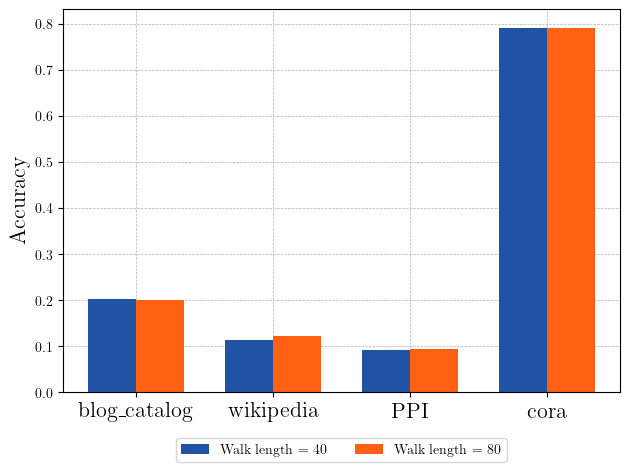

In [124]:
dataset_walk_plot(dynamic_update, 'accuracy', all_dataset_walk_dict)

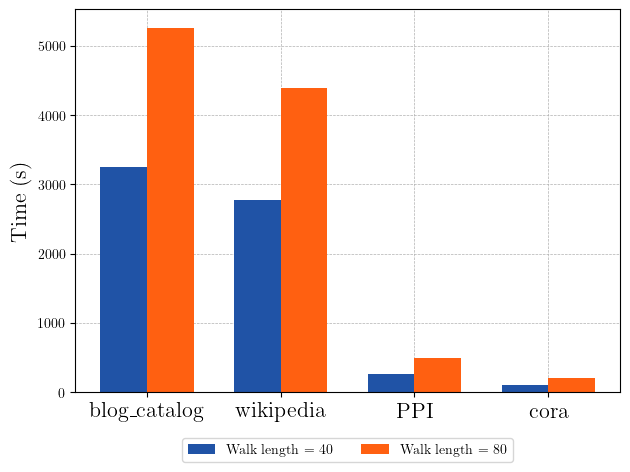

In [125]:
dataset_walk_plot(dynamic_update, 'time', all_dataset_walk_dict)

In [126]:
dynamic_update = 'prune'

all_dataset_walk_dict = dataset_walk_scores_gen(dynamic_update)
all_dataset_walk_dict


{'blog_catalog': {40.0: [0.2005410193711704, 2915.956110060215],
  80.0: [0.19999769708238802, 4940.151242733001]},
 'wikipedia': {40.0: [0.10423977733313412, 2208.3137067556386]},
 'PPI': {40.0: [0.08762960768875264, 208.00507601669864],
  80.0: [0.08845783844683341, 396.1347808539868]},
 'cora': {40.0: [0.7356225974485624, 67.35816725015638],
  80.0: [0.7333733544507433, 134.51013869524004]}}

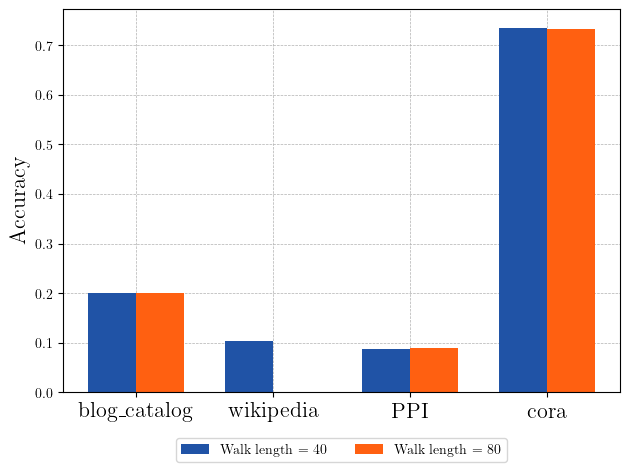

In [127]:
dataset_walk_plot(dynamic_update, 'accuracy', all_dataset_walk_dict)

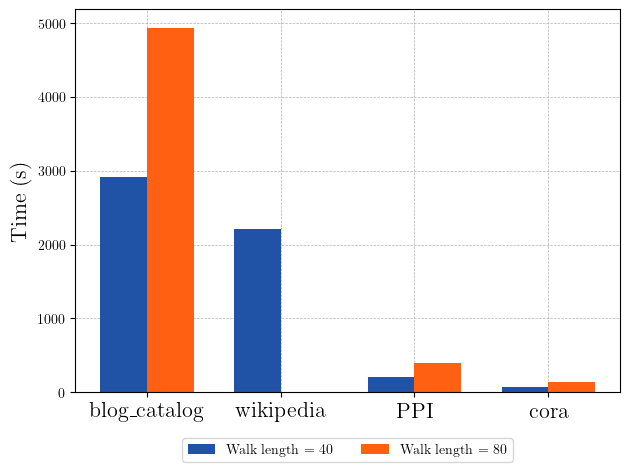

In [128]:
dataset_walk_plot(dynamic_update, 'time', all_dataset_walk_dict)

## Centrality

In [4]:
results_df.head()

,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,...,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,removal_process,execution_timestamp
0,PPI,3890,38739,global,macro,0.117919,0.123484,0.120631,0.109218,0.101414,...,0.092165,0.070849,0.061516,"(128, 40, 80, 0.25, 1)",333.163013,prune,512,2227,betweenness_centrality,11/07/2024 - 20:15
1,PPI,3890,38739,global,micro,0.180473,0.184911,0.166667,0.154586,0.137951,...,0.131924,0.107658,0.098323,"(128, 40, 80, 0.25, 1)",333.163013,prune,512,2227,betweenness_centrality,11/07/2024 - 20:15
2,PPI,3890,38739,local,macro,0.091723,0.084281,0.094639,0.091126,0.081769,...,0.071375,0.065970,0.051746,"(128, 40, 80, 0.25, 1)",68.855529,prune,512,2227,betweenness_centrality,11/07/2024 - 20:15
3,PPI,3890,38739,local,micro,0.136986,0.135802,0.139854,0.128944,0.119649,...,0.103881,0.096022,0.077744,"(128, 40, 80, 0.25, 1)",68.855529,prune,512,2227,betweenness_centrality,11/07/2024 - 20:15
4,PPI,3890,38739,global,macro,0.113568,0.106821,0.097135,0.097138,0.086269,...,0.078349,0.073512,0.066392,"(128, 40, 80, 0.25, 1)",407.610555,extend,512,512,betweenness_centrality,11/07/2024 - 20:01


In [21]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'PPI',
          'dynamic_update': 'prune',
          'metric': 'macro',
          'parameters': '(128, 40, 80, 0.25, 1)'}

In [22]:
sub_df = results_df.copy()

for key in config:
    sub_df = sub_df[sub_df.loc[:, key] == config[key]]

In [23]:
sub_df

,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,...,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,removal_process,execution_timestamp
0,PPI,3890,38739,global,macro,0.117919,0.123484,0.120631,0.109218,0.101414,...,0.092165,0.070849,0.061516,"(128, 40, 80, 0.25, 1)",333.163013,prune,512,2227,betweenness_centrality,11/07/2024 - 20:15
2,PPI,3890,38739,local,macro,0.091723,0.084281,0.094639,0.091126,0.081769,...,0.071375,0.065970,0.051746,"(128, 40, 80, 0.25, 1)",68.855529,prune,512,2227,betweenness_centrality,11/07/2024 - 20:15
256,PPI,3890,38739,global,macro,0.100238,0.102293,0.089567,0.097844,0.088332,...,0.075928,0.066621,0.054594,"(128, 40, 80, 0.25, 1)",341.050711,prune,512,2227,random,12/06/2024 - 17:53
258,PPI,3890,38739,local,macro,0.079820,0.070594,0.080996,0.087415,0.087862,...,0.075724,0.068366,0.055067,"(128, 40, 80, 0.25, 1)",69.428200,prune,512,2227,random,12/06/2024 - 17:53
